In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal, scipy.optimize, scipy.integrate
import yt
# yt.set_log_level(50)
from scipy.fft import fftn

In [13]:
ts = yt.load('hydro_plt*')
# ds = ts[-1]

In [14]:
rho = np.zeros((len(ts), 32, 32, 32))
phi = np.zeros((len(ts), 32, 32, 32))
v_s = np.zeros((len(ts), 3, 32, 32, 32))
P = np.zeros((len(ts), 32, 32, 32))

for i in range(len(ts)):
    ds = ts[i]
    ad = ds.all_data()

    rho[i] = ad[('boxlib','rho')].reshape((32, 32, 32))
    phi[i] = ad[('boxlib','phi')].reshape((32, 32, 32))
    v_s[i, 0] = ad[('boxlib','ux')].reshape((32, 32, 32))
    v_s[i, 1] = ad[('boxlib','uy')].reshape((32, 32, 32))
    v_s[i, 2] = ad[('boxlib','uz')].reshape((32, 32, 32))

    P[i] = ad[('boxlib','p_bulk')].reshape((32, 32, 32))

yt : [INFO     ] 2024-06-19 11:09:54,739 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-06-19 11:09:54,739 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2024-06-19 11:09:54,740 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-06-19 11:09:54,741 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-06-19 11:09:54,823 Parameters: current_time              = 10.0
yt : [INFO     ] 2024-06-19 11:09:54,824 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2024-06-19 11:09:54,824 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-06-19 11:09:54,825 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-06-19 11:09:54,904 Parameters: current_time              = 20.0
yt : [INFO     ] 2024-06-19 11:09:54,904 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2024-06-19 11:09:54,905 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [I

Text(0.5, 1.0, '$\\phi$')

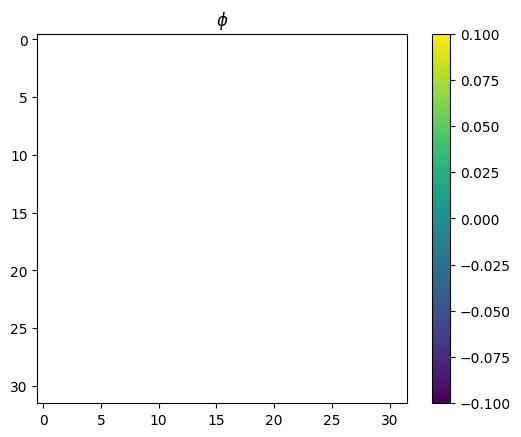

In [15]:
plt.imshow(phi[-1, :, 16, :])
plt.colorbar()
plt.title(r"$\phi$")

In [16]:
S_rho = np.zeros((32, 32, 32), dtype = complex)
S_v = np.zeros((32, 32, 32), dtype = complex)

for i in range(len(ts)):
    r1 = rho[i]
    r_k1 = fftn(r1)
    S_rho += r_k1*np.conj(r_k1)

S_rho /= (len(ts)*(32**3)*1e-7)
S_rho = np.abs(S_rho)

Text(0.5, 1.0, '$S_{\\rho \\rho}$')

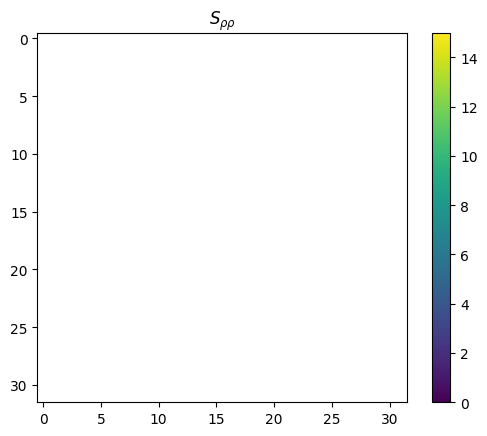

In [17]:
plt.imshow(S_rho[:, 16, :], vmin = 0, vmax = 15)
plt.colorbar()
plt.title(r"$S_{\rho \rho}$")

In [18]:
S_v = np.zeros((3, 3, 32, 32, 32), dtype = complex)

for i in range(len(ts)):
    for j in range(3):
        for k in range(3):
            r1 = v_s[i, j]
            r_k1 = fftn(r1)
            r2 = v_s[i, k]
            r_k2 = fftn(r2)
            S_v[j, k] += r_k1*np.conj(r_k2)

S_v /= (len(ts)*(32**3)*1e-7)
S_v = np.abs(S_v)

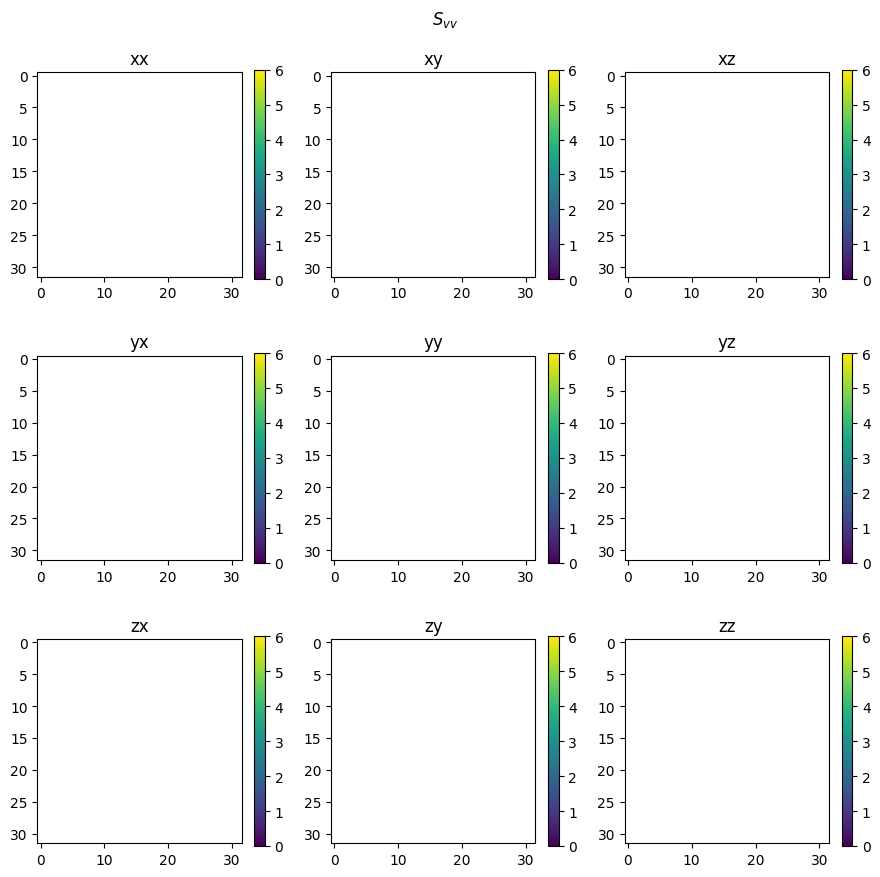

In [19]:
fig, axs = plt.subplots(3, 3, figsize = (9, 9))

for i in range(3):
    for j in range(3):
        ax = axs[i, j]

        im = ax.imshow(S_v[i, j, :, 16, :], vmin = 0, vmax = 6)
        fig.colorbar(im, ax=ax, orientation='vertical', shrink = 0.8) 
        ax.set_title(f"{chr(120 + i)}{chr(120 + j)}")

fig.suptitle(r"$S_{vv}$")
fig.tight_layout()

Text(0, 0.5, 'Counts')

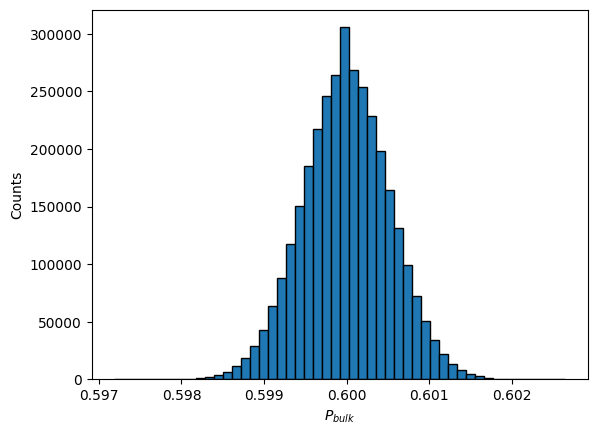

In [9]:
freq, bins, patches = plt.hist(P.flatten(), edgecolor = "k", bins = 50)
plt.xlabel(r"$P_{bulk}$")
plt.ylabel("Counts")